# Analyzing Diabetes Dataset

In [22]:
import pandas as pd

# data
from sklearn.datasets import load_diabetes

# learner
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# make plots larger
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15

In [23]:
diabetes = load_diabetes(as_frame = True)
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [55]:
X = diabetes['data']
y = diabetes['target']

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [56]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [57]:
y.value_counts()

target
200.0    6
72.0     6
90.0     5
178.0    5
71.0     5
        ..
73.0     1
222.0    1
86.0     1
79.0     1
57.0     1
Name: count, Length: 214, dtype: int64

In [58]:
y.value_counts(normalize = True)

target
200.0    0.013575
72.0     0.013575
90.0     0.011312
178.0    0.011312
71.0     0.011312
           ...   
73.0     0.002262
222.0    0.002262
86.0     0.002262
79.0     0.002262
57.0     0.002262
Name: proportion, Length: 214, dtype: float64

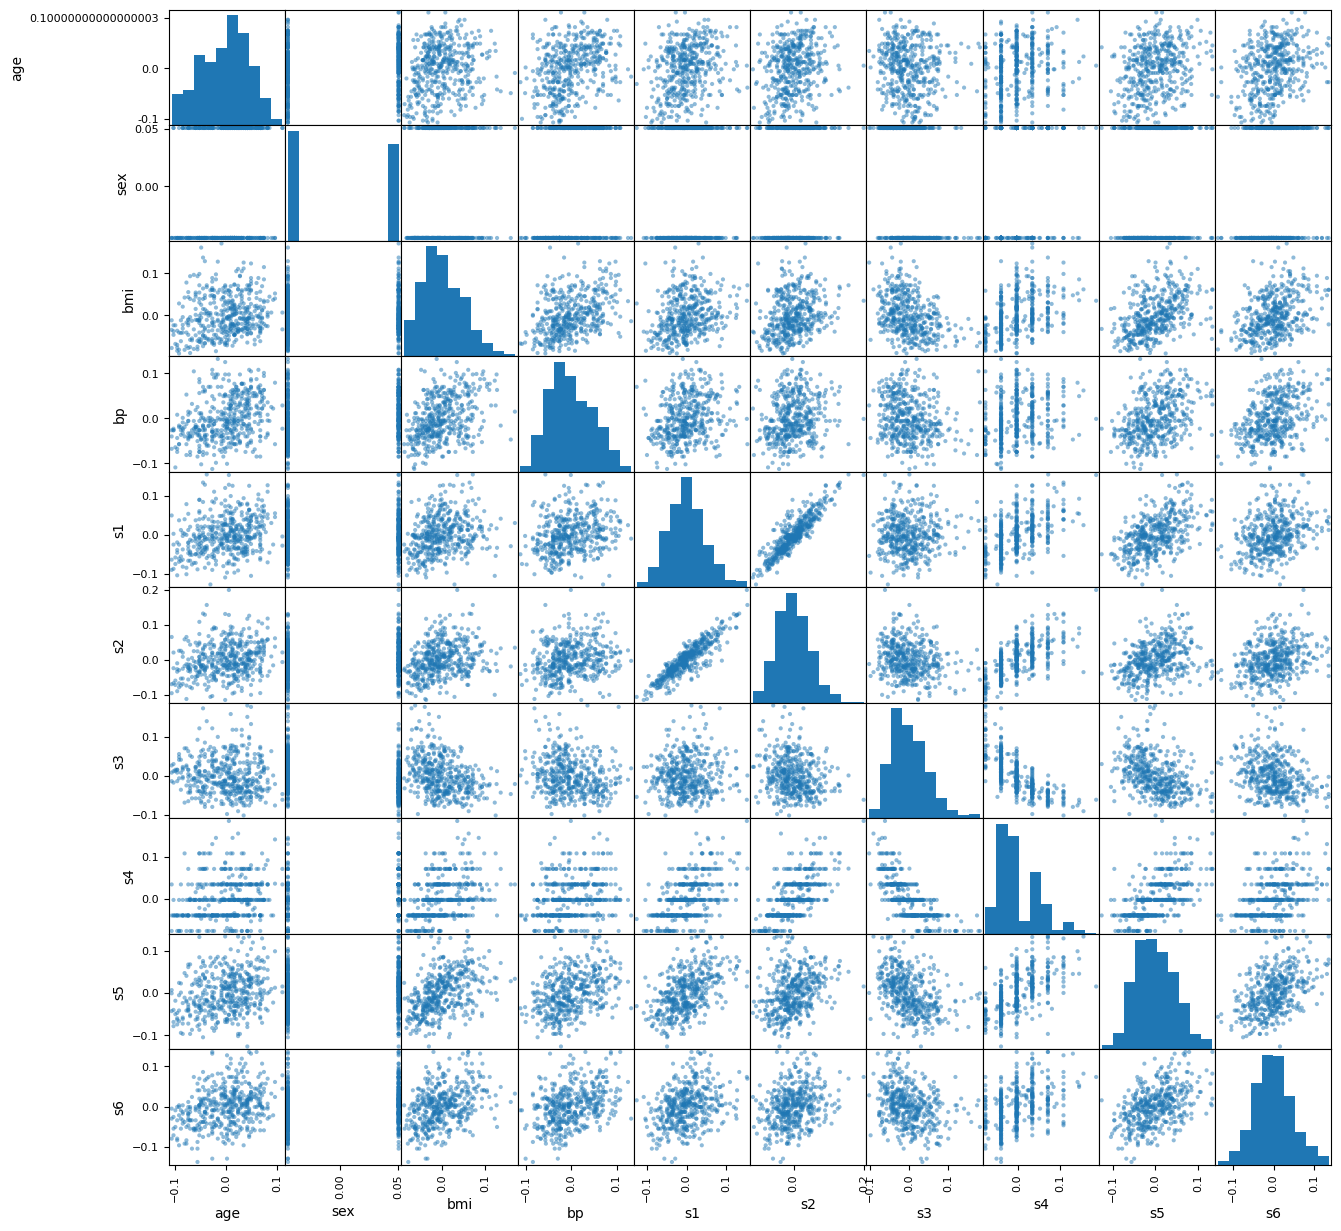

In [59]:
plt = pd.plotting.scatter_matrix(X)

### Create a training and test set

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
232,0.012648,0.050680,0.000261,-0.011420,0.039710,0.057245,-0.039719,0.056081,0.024055,0.032059
80,0.070769,-0.044642,0.012117,0.042529,0.071357,0.053487,0.052322,-0.002592,0.025395,-0.005220
46,-0.056370,-0.044642,-0.011595,-0.033213,-0.046975,-0.047660,0.004460,-0.039493,-0.007977,-0.088062
381,-0.070900,0.050680,-0.089197,-0.074527,-0.042848,-0.025739,-0.032356,-0.002592,-0.012909,-0.054925
...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005670,-0.007073,-0.019476,0.041277,-0.039493,-0.003301,0.007207
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
396,-0.085430,0.050680,-0.030996,-0.022885,-0.063487,-0.054236,0.019187,-0.039493,-0.096435,-0.034215
235,0.067136,0.050680,-0.014828,0.058608,-0.059359,-0.034508,-0.061809,0.012906,-0.005142,0.048628


In [61]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
246,0.041708,-0.044642,-0.032073,-0.061892,0.079612,0.050982,0.056003,-0.009972,0.045067,-0.059067
425,-0.078165,-0.044642,-0.040696,-0.081413,-0.100638,-0.112795,0.022869,-0.076395,-0.020292,-0.050783
293,-0.070900,-0.044642,0.092953,0.012680,0.020446,0.042527,0.000779,0.000360,-0.054540,-0.001078
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
359,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014821,0.061054
...,...,...,...,...,...,...,...,...,...,...
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021395,0.015491
132,0.016281,0.050680,-0.021295,-0.009113,0.034206,0.047850,0.000779,-0.002592,-0.012909,0.023775
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022517,0.007207
286,-0.038207,-0.044642,-0.054707,-0.077970,-0.033216,-0.086490,0.140681,-0.076395,-0.019198,-0.005220


In [62]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)


### Decision Tree on Training Data

In [63]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [64]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
print(tree.export_text(clf, feature_names=list(X_train_df.columns)))


|--- s5 <= -0.21
|   |--- bmi <= -1.41
|   |   |--- bp <= -0.21
|   |   |   |--- age <= -1.34
|   |   |   |   |--- bmi <= -1.61
|   |   |   |   |   |--- s2 <= -1.76
|   |   |   |   |   |   |--- class: 137.0
|   |   |   |   |   |--- s2 >  -1.76
|   |   |   |   |   |   |--- s2 <= -1.11
|   |   |   |   |   |   |   |--- class: 85.0
|   |   |   |   |   |   |--- s2 >  -1.11
|   |   |   |   |   |   |   |--- s5 <= -1.37
|   |   |   |   |   |   |   |   |--- class: 116.0
|   |   |   |   |   |   |   |--- s5 >  -1.37
|   |   |   |   |   |   |   |   |--- s3 <= -0.24
|   |   |   |   |   |   |   |   |   |--- class: 104.0
|   |   |   |   |   |   |   |   |--- s3 >  -0.24
|   |   |   |   |   |   |   |   |   |--- age <= -1.88
|   |   |   |   |   |   |   |   |   |   |--- class: 134.0
|   |   |   |   |   |   |   |   |   |--- age >  -1.88
|   |   |   |   |   |   |   |   |   |   |--- class: 51.0
|   |   |   |   |--- bmi >  -1.61
|   |   |   |   |   |--- s6 <= -1.20
|   |   |   |   |   |   |--- class: 158.0
|

### Test on Test Data

In [65]:
pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [78.0, 152.0, 200.0, 59.0, 311.0, 178.0, 332.0, 132.0, 156.0, 135.0, 220.0, 233.0, 91.0, 51.0, 195.0, 109.0, 217.0, 94.0, 89.0, 111.0, 129.0, 181.0, 168.0, 97.0, 115.0, 202.0, 84.0, 147.0, 253.0, 144.0, 262.0, 115.0, 68.0, 65.0, 252.0, 212.0, 142.0, 215.0, 180.0, 163.0, 151.0, 283.0, 66.0, 83.0, 214.0, 189.0, 302.0, 93.0, 178.0, 241.0, 52.0, 144.0, 102.0, 200.0, 232.0, 97.0, 109.0, 55.0, 63.0, 98.0, 88.0, 233.0, 235.0, 97.0, 243.0, 59.0, 138.0, 220.0, 137.0, 72.0, 109.0, 71.0, 74.0, 219.0, 196.0, 170.0, 199.0, 71.0, 155.0, 52.0, 63.0, 88.0, 97.0, 100.0, 64.0, 107.0, 49.0, 60.0, 346.0]
pred:	 [162.0, 150.0, 103.0, 96.0, 163.0, 185.0, 275.0, 160.0, 124.0, 144.0, 122.0, 58.0, 118.0, 113.0, 236.0, 257.0, 308.0, 52.0, 64.0, 164.0, 150.0, 72.0, 61.0, 143.0, 72.0, 85.0, 214.0, 257.0, 84.0, 138.0, 259.0, 164.0, 99.0, 40.0, 202.0, 122.0, 158.0, 242.0, 164.0, 152.0, 185.0, 191.0, 200.0, 160.0, 190.0, 296.0, 174.0, 185.0, 275.0, 120.0, 60.0, 170.0, 158.0, 153.0, 90.0, 160.0, 85.0, 50.0, 

In [66]:
confusion_matrix(pred, y_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
print("Accuracy:",accuracy_score(pred, y_test)*100)

Accuracy: 0.0


### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)


0.0

### Cross Validation

In [69]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv = 5)
scores

/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.        , 0.        , 0.01136364, 0.01136364, 0.        ])

In [70]:
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.004545454545454545
